# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

print('Beginning Data Retrieval ')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
retrieval_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(retrieval_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f'Processing Record {index_count} of Set {set_count} : {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : new norfolk
Processing Record 2 of Set 1 : cape town
Processing Record 3 of Set 1 : avarua
Processing Record 4 of Set 1 : uhlove
Processing Record 5 of Set 1 : chuy
Processing Record 6 of Set 1 : lima
Processing Record 7 of Set 1 : granada
Processing Record 8 of Set 1 : manbij
Processing Record 9 of Set 1 : shelburne
Processing Record 10 of Set 1 : ushuaia
Processing Record 11 of Set 1 : horsham
Processing Record 12 of Set 1 : russell
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : taksimo
Processing Record 15 of Set 1 : bluff
Processing Record 16 of Set 1 : mataura
Processing Record 17 of Set 1 : meridian
Processing Record 18 of Set 1 : correntina
Processing Record 19 of Set 1 : bubaque
Processing Record 20 of Set 1 : bethel
Processing Record 21 of Set 1 : nola
Processing Record 22 of Set 1 : rikitea
Processing Record 23 of Set 1 : tezu
City not found. Skipping...
Proces

Processing Record 35 of Set 4 : kiunga
Processing Record 36 of Set 4 : clyde river
Processing Record 37 of Set 4 : umm lajj
Processing Record 38 of Set 4 : mantua
City not found. Skipping...
Processing Record 39 of Set 4 : ambulu
Processing Record 40 of Set 4 : ngunguru
Processing Record 41 of Set 4 : port alfred
City not found. Skipping...
Processing Record 42 of Set 4 : bredasdorp
Processing Record 43 of Set 4 : lata
Processing Record 44 of Set 4 : debre zeyit
Processing Record 45 of Set 4 : aksarayskiy
Processing Record 46 of Set 4 : verkhniy mamon
Processing Record 47 of Set 4 : la espigadilla
Processing Record 48 of Set 4 : tilichiki
Processing Record 49 of Set 4 : matay
Processing Record 50 of Set 4 : castro
Processing Record 0 of Set 5 : svetlograd
Processing Record 1 of Set 5 : hobart
City not found. Skipping...
Processing Record 2 of Set 5 : ribeira grande
Processing Record 3 of Set 5 : matata
Processing Record 4 of Set 5 : carnarvon
City not found. Skipping...
Processing Reco

Processing Record 19 of Set 8 : bathsheba
Processing Record 20 of Set 8 : pangnirtung
Processing Record 21 of Set 8 : volodarskiy
Processing Record 22 of Set 8 : marysville
Processing Record 23 of Set 8 : tuatapere
Processing Record 24 of Set 8 : dunedin
Processing Record 25 of Set 8 : khani
Processing Record 26 of Set 8 : bowen
City not found. Skipping...
Processing Record 27 of Set 8 : egvekinot
Processing Record 28 of Set 8 : camacupa
Processing Record 29 of Set 8 : saint-augustin
City not found. Skipping...
Processing Record 30 of Set 8 : ormstown
Processing Record 31 of Set 8 : lohardaga
Processing Record 32 of Set 8 : bavly
Processing Record 33 of Set 8 : uthal
Processing Record 34 of Set 8 : mogadishu
Processing Record 35 of Set 8 : sisimiut
Processing Record 36 of Set 8 : kavaratti
Processing Record 37 of Set 8 : klaksvik
Processing Record 38 of Set 8 : aksarka
Processing Record 39 of Set 8 : antsohihy
Processing Record 40 of Set 8 : linfen
Processing Record 41 of Set 8 : ontar

City not found. Skipping...
Processing Record 49 of Set 11 : freeport
Processing Record 50 of Set 11 : gazanjyk
Processing Record 0 of Set 12 : kargopol
Processing Record 1 of Set 12 : otake
Processing Record 2 of Set 12 : rudnogorsk
Processing Record 3 of Set 12 : ixtapa
Processing Record 4 of Set 12 : emporia
Processing Record 5 of Set 12 : fengxian
City not found. Skipping...
Processing Record 6 of Set 12 : superior
Processing Record 7 of Set 12 : yulara
Processing Record 8 of Set 12 : china
Processing Record 9 of Set 12 : san joaquin
Processing Record 10 of Set 12 : agadez
Processing Record 11 of Set 12 : fulton
Processing Record 12 of Set 12 : naze
Processing Record 13 of Set 12 : tonstad
Processing Record 14 of Set 12 : tessalit
Processing Record 15 of Set 12 : panzhihua
Processing Record 16 of Set 12 : daru
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#build dataframe
weather_df = pd.DataFrame({
    'City' : city_name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity': humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date,
    
})

#export to csv
weather_df.to_csv('output_data/cities.csv', index = False)

#display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,61.00,83,76,1.92,AU,1611943324
1,Cape Town,-33.9258,18.4232,73.40,56,0,13.80,ZA,1611942913
2,Avarua,-21.2078,-159.7750,78.80,89,40,5.75,CK,1611943097
3,Uglovoye,44.8215,33.6045,44.01,62,99,7.00,UA,1611943325
4,Chui,-33.6971,-53.4616,79.63,59,52,10.56,UY,1611942967
...,...,...,...,...,...,...,...,...,...
572,Naze,28.3667,129.4833,48.69,73,65,14.07,JP,1611943155
573,Tonstad,58.6626,6.7169,32.00,74,0,3.44,NO,1611943428
574,Tessalit,20.1986,1.0114,72.77,17,0,9.46,ML,1611943125
575,Panzhihua,26.5851,101.7128,45.00,53,0,0.49,CN,1611943429


In [5]:
#summary stats for dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.862634,24.090752,49.150035,72.802426,51.268631,8.304298,1.611943e+09
std,32.911273,91.829072,34.112612,19.058366,38.599379,5.630127,1.374981e+02
min,-54.800000,-179.166700,-49.700000,8.000000,0.000000,0.070000,1.611943e+09
25%,-6.466700,-56.154900,28.980000,64.000000,10.000000,3.940000,1.611943e+09
50%,23.700000,29.116400,59.970000,78.000000,53.000000,6.910000,1.611943e+09
75%,47.570200,105.922800,77.000000,86.000000,90.000000,11.500000,1.611943e+09
max,78.218600,179.316700,99.000000,100.000000,100.000000,34.520000,1.611943e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#n/a no data with >100% humidity see above 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

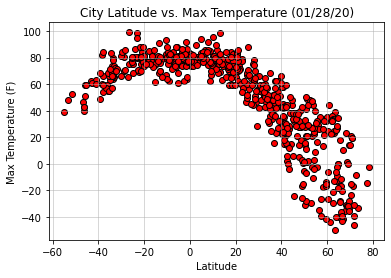

In [7]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolor = 'red', edgecolor = 'black')

#title
plt.title('City Latitude vs. Max Temperature (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Max Temperature (F)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city__latitude_vs_max_temperature.png')

## Latitude vs. Humidity Plot

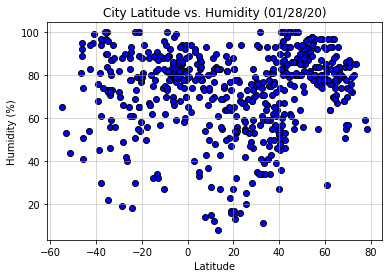

In [8]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor = 'blue', edgecolor = 'black')

#title
plt.title('City Latitude vs. Humidity (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Humidity (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

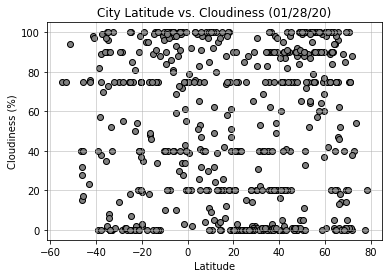

In [9]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolor = 'gray', edgecolor = 'black')

#title
plt.title('City Latitude vs. Cloudiness (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Cloudiness (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

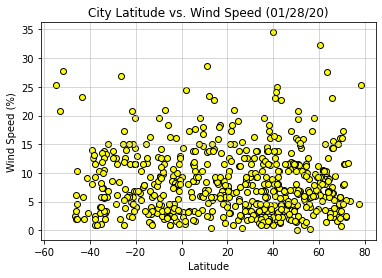

In [10]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolor = 'yellow', edgecolor = 'black')

#title
plt.title('City Latitude vs. Wind Speed (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Wind Speed (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Wind Speed.png')

## Linear Regression

In [11]:
#northern & southern dataframes
northern_hem = weather_df.loc[weather_df['Lat']>= 0]
southern_hem = weather_df.loc[weather_df['Lat']<= 0]

#functions for linear regression
def linear_regression(x,y):
    print(f'the r-value is: {round(st.pearsonr(x,y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, 'r-')
    return line_eq

#function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize = 15, color='orange')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: -0.86


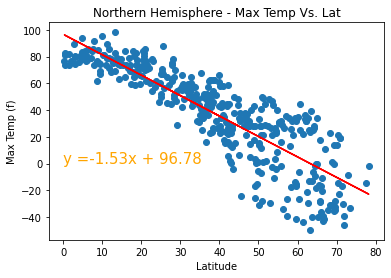

In [12]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Max Temp'])

annotate(equation, 0, 0)

plt.title('Northern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_max_temp_vs_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.6


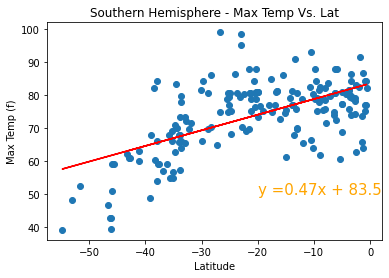

In [24]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Max Temp'])

annotate(equation, -20, 50)

plt.title('Southern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_max_temp_vs_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.33


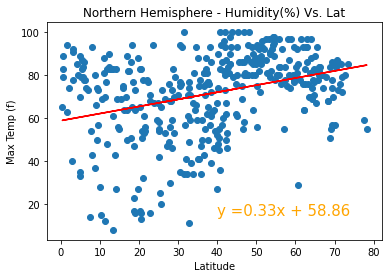

In [14]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Humidity'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_humidity_vs_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.15


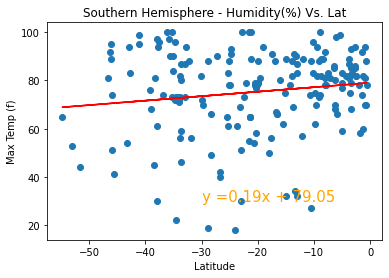

In [23]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Humidity'])

annotate(equation, -30, 30)

plt.title('Southern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_humidity_vs_Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.14


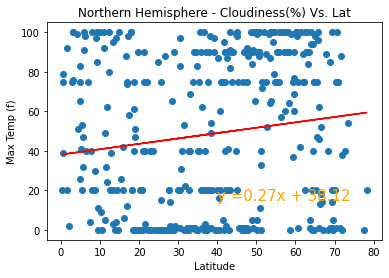

In [16]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Cloudiness'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_cloudiness_vs_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.23


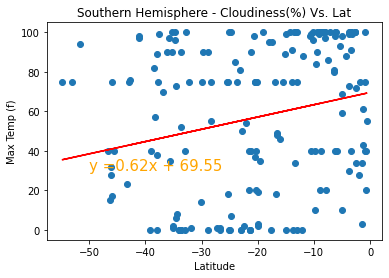

In [17]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Cloudiness'])

annotate(equation, -50, 30)

plt.title('Southern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_cloudiness_vs_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: -0.05


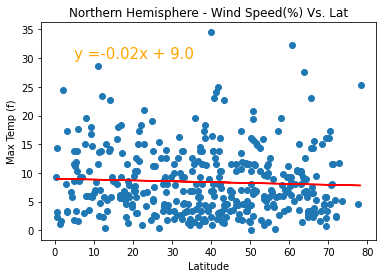

In [22]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Wind Speed'])

annotate(equation, 5, 30)

plt.title('Northern Hemisphere - Wind Speed(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_wind_speed_vs_Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: -0.13


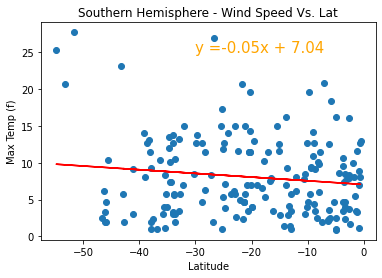

In [21]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Wind Speed'])

annotate(equation, -30, 25)

plt.title('Southern Hemisphere - Wind Speed Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_wind_speed_vs_Lat.png')